Jeu de données

In [2]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report 
from tensorflow.python import keras 
import tensorflow as tf 
from tensorflow.python.keras.models import Sequential 
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D 
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
IMG_ROWS = 28 
IMG_COLS = 28 
NUM_CLASSES = 10 
TEST_SIZE = 0.2 
RANDOM_STATE = 2018 
NO_EPOCHS = 50 
BATCH_SIZE = 128 

In [7]:
train_data = pd.read_csv("fashion-mnist_train.csv")
train_data.head(8)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
print(train_data.shape) 

(60000, 785)


In [9]:
test_data = pd.read_csv("fashion-mnist_test.csv") 
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
test_data.shape

(10000, 785)

In [12]:
# Create a dictionary for each type of label 
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 
5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"} 

In [15]:
def get_classes_distribution(data): 
 # Get the count for each label 
 label_counts = data["label"].value_counts() 
 # Get total number of samples 
 total_samples = len(data) 
 # Count the number of items in each class 
 for i in range(len(label_counts)):
    label = labels[label_counts.index[i]] 
    count = label_counts.values[i] 
    percent = (count / total_samples) * 100 
    print("{:<20s}: {} or {}%".format(label, count, percent)) 
 ########################################################### 
get_classes_distribution(train_data)

Pullover            : 6000 or 10.0%
Ankle Boot          : 6000 or 10.0%
Shirt               : 6000 or 10.0%
T-shirt/top         : 6000 or 10.0%
Dress               : 6000 or 10.0%
Coat                : 6000 or 10.0%
Sandal              : 6000 or 10.0%
Bag                 : 6000 or 10.0%
Sneaker             : 6000 or 10.0%
Trouser             : 6000 or 10.0%


C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


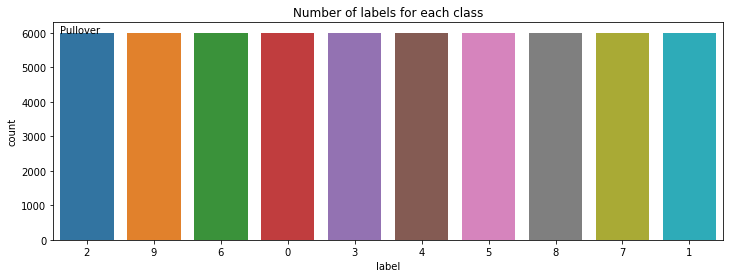

In [17]:
def plot_label_per_class(data): 
 f, ax = plt.subplots(1,1, figsize=(12,4)) 
 g = sns.countplot(data.label, order = data["label"].value_counts().index) 
 g.set_title("Number of labels for each class") 
 for p, label in zip(g.patches, data["label"].value_counts().index): 
    g.annotate(labels[label], (p.get_x(), p.get_height()+0.1)) 
    plt.show() 
############################################ 
plot_label_per_class(train_data)

In [20]:
def sample_images_data(data): 
 # An empty list to collect some samples 
 sample_images = [] 
 sample_labels = [] 
 # Iterate over the keys of the labels dictionary defined in the above cell 
 for k in labels.keys(): 
 # Get four samples for each category 
    samples = data[data["label"] == k].head(4) 
 # Append the samples to the samples list 
 for j, s in enumerate(samples.values): 
 # First column contain labels, hence index should start from 1 
    img = np.array(samples.iloc[j, 1:]).reshape(IMG_ROWS,IMG_COLS) 
    sample_images.append(img) 
    sample_labels.append(samples.iloc[j, 0]) 
    print("Total number of sample images to plot: ", len(sample_images)) 
 return sample_images, sample_labels 
############################################ 
train_sample_images, train_sample_labels = sample_images_data(train_data) 


Total number of sample images to plot:  1
Total number of sample images to plot:  2
Total number of sample images to plot:  3
Total number of sample images to plot:  4


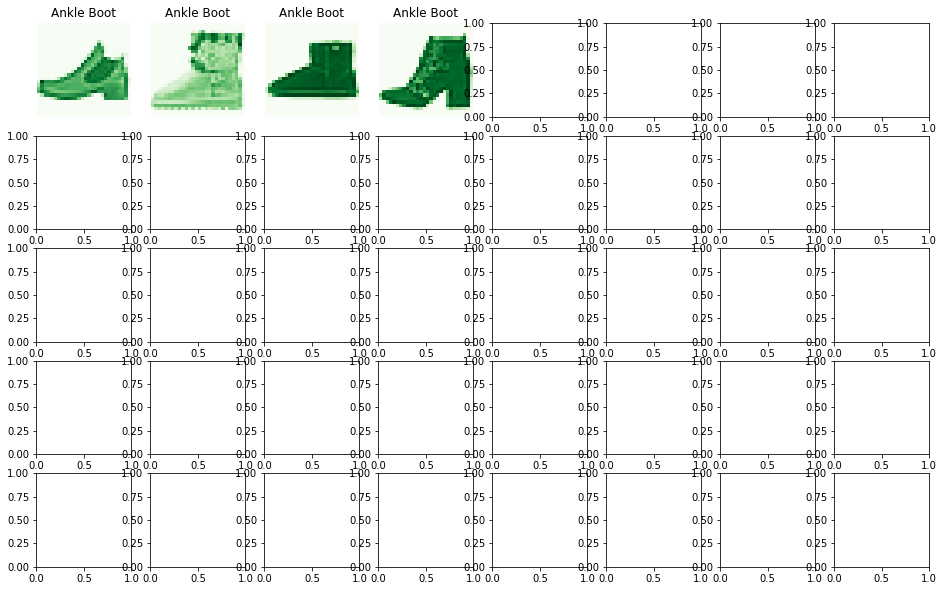

In [22]:
def plot_sample_images(data_sample_images,data_sample_labels,cmap="Blues"): 
 # Plot the sample images now 
 f, ax = plt.subplots(5,8, figsize=(16,10)) 
 for i, img in enumerate(data_sample_images): 
    ax[i//8, i%8].imshow(img, cmap=cmap) 
    ax[i//8, i%8].axis('off') 
    ax[i//8, i%8].set_title(labels[data_sample_labels[i]]) 
plt.show() 
############################################ 
plot_sample_images(train_sample_images,train_sample_labels, "Greens")

Total number of sample images to plot:  1
Total number of sample images to plot:  2
Total number of sample images to plot:  3
Total number of sample images to plot:  4


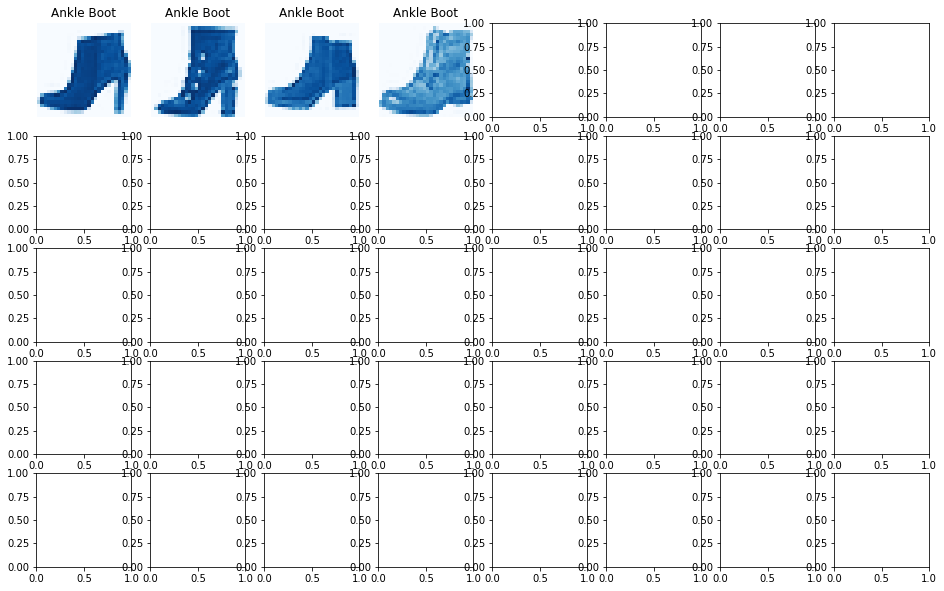

In [23]:
test_sample_images, test_sample_labels = sample_images_data(test_data) 
plot_sample_images(test_sample_images,test_sample_labels) 

 Construction du réseau profond de neurones convolutif (CNN) 